In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
candy = pd.read_csv("candy_production.csv")
candy.head(12)

,observation_date,industrial_production
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
5,1972-06-01,67.6467
6,1972-07-01,69.0429
7,1972-08-01,70.8370
8,1972-09-01,75.0462
9,1972-10-01,106.9289


In [6]:
candy.tail(12)

,observation_date,industrial_production
536,2016-09-01,109.3191
537,2016-10-01,119.0502
538,2016-11-01,116.8431
539,2016-12-01,116.4535
540,2017-01-01,109.4666
541,2017-02-01,113.4661
542,2017-03-01,105.2245
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022


In [7]:
candy['observation_date'] = pd.to_datetime(candy['observation_date'])

In [8]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   observation_date       548 non-null    datetime64[ns]
 1   industrial_production  548 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


<Axes: xlabel='observation_date'>

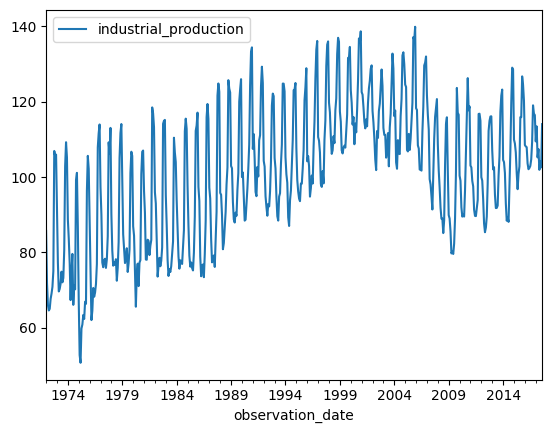

In [9]:
candy.plot(x='observation_date', y='industrial_production')

In [11]:
candy_filtered = candy[candy['observation_date'] > '2010-01-01']

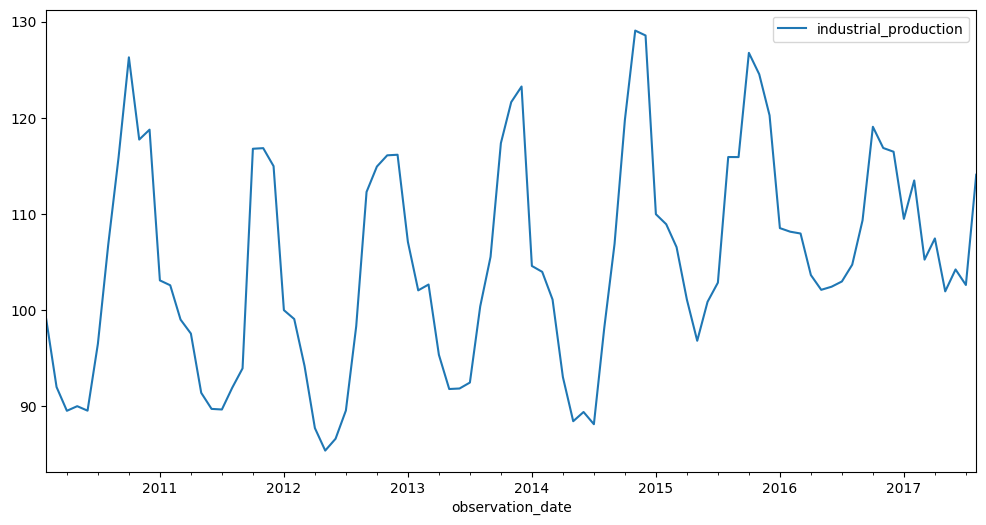

In [13]:
ax = candy_filtered.plot(x='observation_date', y='industrial_production', figsize=(12, 6))

In [12]:
candy_filtered

,observation_date,industrial_production
457,2010-02-01,99.0155
458,2010-03-01,91.9654
459,2010-04-01,89.4914
460,2010-05-01,89.9713
461,2010-06-01,89.5047
...,...,...
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861


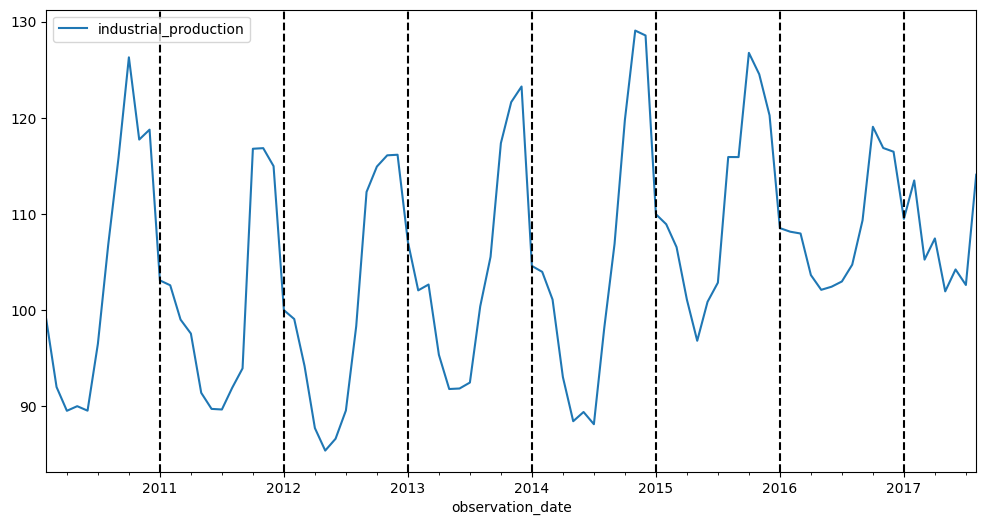

In [14]:
ax = candy_filtered.plot(x='observation_date', y='industrial_production', figsize=(12, 6))
xcoords = ['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']

for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

In [17]:
!python -m pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------------------------- -------- 7.6/9.6 MB 44.7 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 40.9 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- -----------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


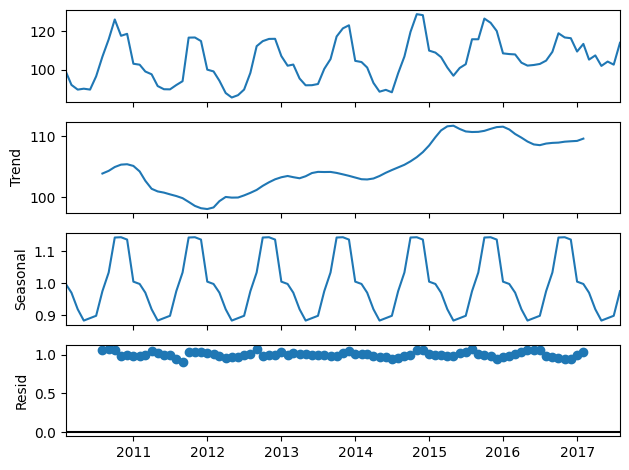

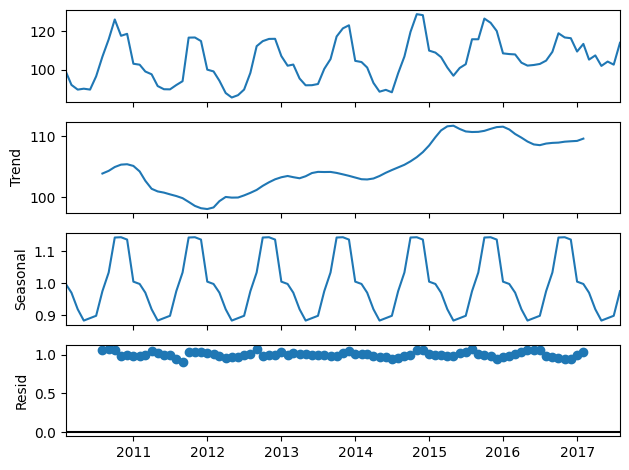

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

candy_filtered.set_index('observation_date', inplace=True)

analysis = candy_filtered[['industrial_production']].copy()

decompose_result = seasonal_decompose(analysis, model='multiplicative')

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()